# Assignment 1 - Flower Drawing Optimization

Who doesn't love flowers? In this assignment we will plot many beautiful flowers using my very special custom algorithm. It is blazingly fast, and chock-a-block full of state of the art optimizations!

In [3]:
# Ignore me
%load_ext autoreload

In [6]:
# Ignore me - im just an import block
%autoreload 2

from SlowFlowers import BadFlowerDrawer
import matplotlib.pyplot as plt
import random as rnd
import time
import cProfile
import subprocess
from IPython.display import Image

## Lets use my super special algorithm to plot a flower
Using the computation we developed in the lab document, we can see the implementation in the following graphic!
The code for this is present in `SlowFlowers.py`.

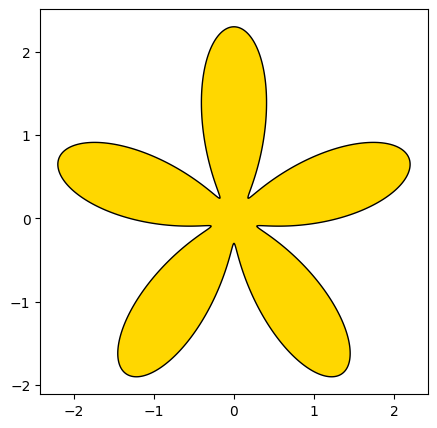

In [7]:
bad_flower_instance = BadFlowerDrawer()
x, y = zip(*bad_flower_instance.draw_one_flower(1))

plt.figure(figsize=(5,5))
plt.fill(x,y, edgecolor='black', facecolor='gold')
plt.show()

## Lets plot even more fun flowers
I have also added a feature to plot as many flowers as you wish! All you have to do is supply a list of tuples containing the center point and size of the flower you would like to draw, and my algorithm will take care of the rest.

In [ ]:
inputs = [(19, 21, 2), (15, 11, 3), (19, 4, 2), (7, 20, 2), (5, 6, 1)]
print(inputs)

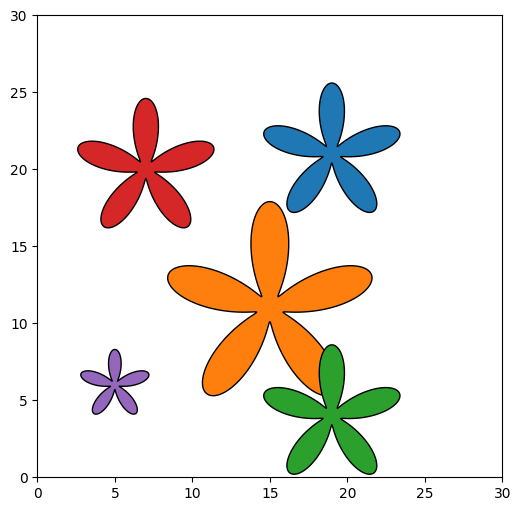

Total Time to compute 5 flowers: 85.81 seconds


In [41]:

start = time.perf_counter()
flowers = bad_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()
good_flowers = flowers

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)
for t in flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

print(f"Total Time to compute 5 flowers: {stop-start:.2f} seconds")

## And it only took 85 seconds to draw all of those flowers...
Huh, thats not as fast as I had hoped... Maybe we can do some profiling to figure out where I am losing all of this time...

In [42]:
# This cell takes some time to run... try not to run it if you don't want to wait for ever. 
# For me it took 4 minutes, you can safley skip it.
cProfile.run('bad_flower_instance.draw_many_flower(inputs)')

         156437319 function calls in 221.014 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002  221.014  221.014 <string>:1(<module>)
    12500   55.650    0.004  220.957    0.018 SlowFlowers.py:11(place_in_list)
 15642480   58.590    0.000  149.461    0.000 SlowFlowers.py:39(compute_point)
 31284960   58.954    0.000   84.118    0.000 SlowFlowers.py:47(polar_to_cartesian)
        5    0.055    0.011  221.012   44.202 SlowFlowers.py:53(draw_one_flower)
        1    0.000    0.000  221.012  221.012 SlowFlowers.py:89(draw_many_flower)
        1    0.000    0.000  221.014  221.014 {built-in method builtins.exec}
    12505    0.010    0.000    0.010    0.000 {built-in method builtins.len}
 31259960   15.805    0.000   15.805    0.000 {built-in method math.atan2}
 46927440   18.583    0.000   18.583    0.000 {built-in method math.cos}
 31284960   13.333    0.000   13.333    0.000 {built-in method math.s

## While this is useful info, Its quite dense to read - lets make it a graphical view

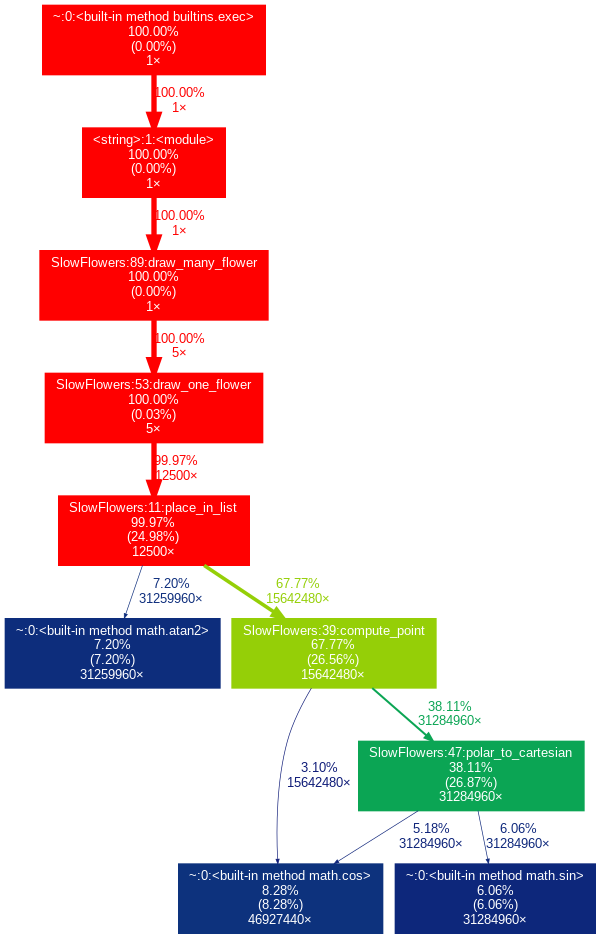

In [43]:
# Same with this cell, it takes some time, and is only necessary to generate the 
# profiling analysis. - You can re run it with your flowers if you change the commands in the cProfile call!
cProfile.run('bad_flower_instance.draw_many_flower(inputs)', 'flowers.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './flowers.pstats', '-o', 'flowers.dot' ])
subprocess.call(['dot', '-Tpng', '-o', 'flowers.png', 'flowers.dot' ])
Image('flowers.png')

# Why is my code so bad???
## This is your asignment sandbox location

In the next cells is setup a place to test your updated flower code.

- Help me fix my slow flower class, and make it faster. 
- You can run it here, and see if the circles are the same.

**If the circles are not the same here, they will not be the same on the autograder, So be sure to test them here first!**

In [48]:
def flowers_are_same(good_flowers, suspicious_flowers):
    """Compares two sets of flowers and determines weather they are same"""
    good_f_rounded = []
    sus_f_rounded = []
    for f, fs in zip(good_flowers, suspicious_flowers):
        f_r = []
        fs_r = []
        if len(f) != len(fs):
            return False
        for idx, g in enumerate(f):
            f_r += (round(g[0], 9), round(g[1], 9)),
            fs_r += (round(fs[idx][0], 9), round(fs[idx][1], 9)),
        good_f_rounded += f_r,
        sus_f_rounded += fs_r,

    for good_flower, sus_flower in zip(good_f_rounded, sus_f_rounded):
        if good_flower != sus_flower:
            for idx, p in enumerate(good_flower):
                if sus_flower[idx] != p:
                    print(idx)
                    print(p, sus_flower[idx])
            return False
        return True

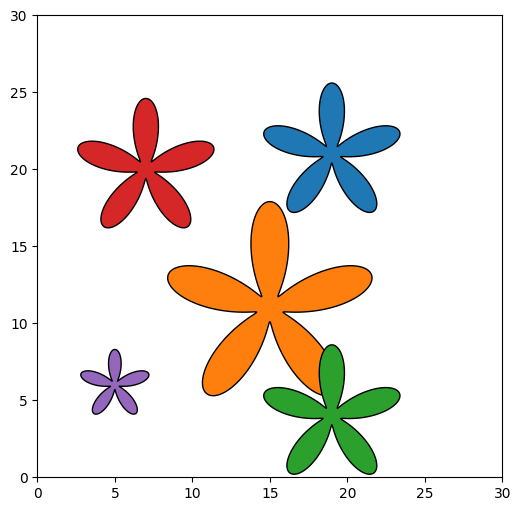

Total Time to compute 5 flowers: 0.04 seconds
The flowers ARE NOT the same!


In [50]:
from FastFlowers import FastFlowerDrawer

fast_flower_instance = FastFlowerDrawer()


start = time.perf_counter()
fast_flowers = fast_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)

for t in fast_flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

tot_time = stop-start
print(f"Total Time to compute 5 flowers: {tot_time:.2f} seconds")

same = flowers_are_same(good_flowers, fast_flowers)
print(f"The flowers {'ARE' if same else 'ARE NOT'} the same!")

# When the flowers are not the same it will look like this

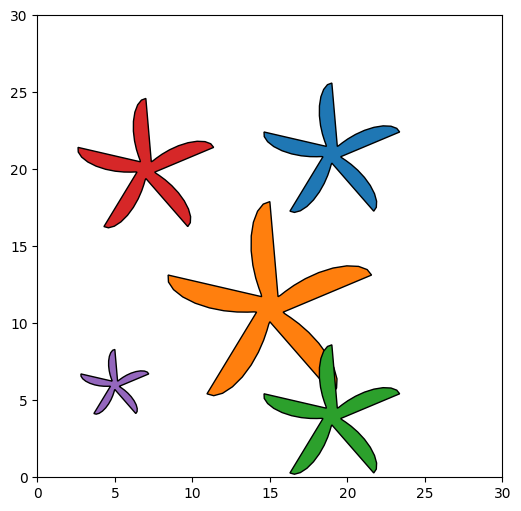

Total Time to compute 5 flowers: 0.04 seconds
The flowers ARE NOT the same!


In [49]:
from NotReallyFlowers import NotReallyAFlowerDrawer

not_flower_instance = NotReallyAFlowerDrawer()


start = time.perf_counter()
not_flowers = not_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)

for t in not_flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

tot_time = stop-start
print(f"Total Time to compute 5 flowers: {tot_time:.2f} seconds")

same = flowers_are_same(good_flowers, not_flowers)
print(f"The flowers {'ARE' if same else 'ARE NOT'} the same!")

# Your Assignment

1. Make `FastFlowers.py` *actually* fast
2. Test your faster code with the above testing structure
3. **Ensure** that your flowers match the original flowers for points!